This notebook was made with this dataset https://www.kaggle.com/datasets/ryleymcconkey/ml-turbulence-dataset? using its kepsilon.csv file.

After checking for nulls, duplicates and scaling, having lots of features led me to implement PCA. Trained using DNN and Multi output XGB regressor. XGB regressor had better results than DNN, especially for labels_uw and labels_vw which were way off in the DNN, and trained a lot faster.

Used Claude 3.5 to help mw with the syntax and what to choose with the plottings.

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('kepsilon.csv')
df.head()

,Unnamed: 0,kepsilon_Cx,kepsilon_Cy,kepsilon_Cz,kepsilon_Ux,kepsilon_Uy,kepsilon_Uz,kepsilon_p,kepsilon_epsilon,kepsilon_k,...,labels_um,labels_vm,labels_wm,labels_uu,labels_uv,labels_uw,labels_vv,labels_vw,labels_ww,Case
0,0,7.03529,3.034,0.05,0.003933,2.656620e-07,-2.371910e-25,-0.000107,0.000004,0.000002,...,0.001764,2.535930e-07,0.000002,9.099550e-07,1.269170e-08,0.0,1.279950e-09,0.0,3.109570e-07,PHLL_case_0p5
1,1,6.96386,3.034,0.05,0.003912,4.308370e-07,2.374130e-25,-0.000103,0.000004,0.000002,...,0.001756,3.409760e-07,0.000002,9.114540e-07,1.285660e-08,0.0,1.308150e-09,0.0,3.148360e-07,PHLL_case_0p5
2,2,6.89244,3.034,0.05,0.003892,2.337990e-07,4.439740e-25,-0.000100,0.000004,0.000002,...,0.001746,3.680100e-07,0.000002,9.128780e-07,1.300350e-08,0.0,1.338600e-09,0.0,3.188870e-07,PHLL_case_0p5
3,3,6.82101,3.034,0.05,0.003872,4.704840e-07,4.275030e-25,-0.000096,0.000004,0.000002,...,0.001734,3.687840e-07,0.000002,9.144310e-07,1.317750e-08,0.0,1.374200e-09,0.0,3.228580e-07,PHLL_case_0p5
4,4,6.74959,3.034,0.05,0.003844,4.610590e-07,0.000000e+00,-0.000093,0.000004,0.000002,...,0.001722,4.546490e-07,0.000002,9.155300e-07,1.333580e-08,0.0,1.410360e-09,0.0,3.262610e-07,PHLL_case_0p5


In [ ]:
df.shape

(895640, 283)

In [ ]:
df.describe()

,Unnamed: 0,kepsilon_Cx,kepsilon_Cy,kepsilon_Cz,kepsilon_Ux,kepsilon_Uy,kepsilon_Uz,kepsilon_p,kepsilon_epsilon,kepsilon_k,...,labels_tau_33,labels_um,labels_vm,labels_wm,labels_uu,labels_uv,labels_uw,labels_vv,labels_vw,labels_ww
count,895640.000000,895640.000000,895640.000000,895640.000000,895640.000000,895640.000000,8.956400e+05,8.956400e+05,8.956400e+05,8.956400e+05,...,895640.000000,895640.000000,895640.000000,895640.000000,895640.000000,895640.000000,8.956400e+05,8.956400e+05,8.956400e+05,895640.000000
mean,40478.489758,3.946571,0.684325,0.113767,4.669103,-0.034452,9.333795e-15,-4.496584e+00,2.884760e+02,9.928543e-01,...,0.402464,5.608039,-0.094093,-0.000001,0.705201,-0.204549,-1.359287e-06,2.871643e-01,-6.072674e-09,0.402464
std,41498.600104,5.600255,1.348276,0.198281,6.298859,0.740923,7.080934e-12,1.605198e+01,1.377665e+03,1.593111e+00,...,0.906041,7.318170,0.978417,0.001320,1.582177,0.540844,1.182863e-04,7.087897e-01,1.379124e-05,0.906041
min,0.000000,-7.264670,-0.498505,-0.498505,-1.291040,-2.147410,-1.248320e-10,-9.864090e+01,1.680860e-08,6.840190e-08,...,0.000000,-1.877020,-4.018943,-0.017167,0.000000,-4.367508,-9.489061e-04,3.161123e-14,-2.127504e-04,0.000000
25%,7721.000000,0.273305,0.019601,0.025000,0.347225,-0.076843,-1.255017e-22,-2.494882e-01,2.103337e-03,6.350922e-03,...,0.000114,0.416454,-0.092677,0.000000,0.001802,-0.124215,-3.544694e-07,1.920675e-04,0.000000e+00,0.000114
50%,28326.000000,1.250000,0.096835,0.050000,0.909178,-0.000070,0.000000e+00,-1.566495e-12,1.591725e-02,1.386950e-02,...,0.002146,0.955644,-0.000999,0.000000,0.007715,-0.000293,0.000000e+00,1.500282e-03,0.000000e+00,0.002146
75%,59061.000000,6.606607,1.016360,0.250000,9.254810,0.000355,3.267637e-23,3.506253e-02,8.319065e+01,1.972832e+00,...,0.338569,12.607413,0.001438,0.000000,0.585165,0.000005,0.000000e+00,1.991498e-01,2.449383e-08,0.338569
max,183711.000000,25.305400,9.479090,0.505000,19.666500,4.779190,1.263570e-10,4.647700e+01,4.900630e+04,9.083480e+00,...,6.920628,22.991733,5.944644,0.015958,12.904184,1.516789,1.053177e-03,6.061361e+00,3.113538e-04,6.920628


In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
df.isnull().sum()

Unnamed: 0     0
kepsilon_Cx    0
kepsilon_Cy    0
kepsilon_Cz    0
kepsilon_Ux    0
              ..
labels_uw      0
labels_vv      0
labels_vw      0
labels_ww      0
Case           0
Length: 283, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'kepsilon_Cx', 'kepsilon_Cy', 'kepsilon_Cz',
       'kepsilon_Ux', 'kepsilon_Uy', 'kepsilon_Uz', 'kepsilon_p',
       'kepsilon_epsilon', 'kepsilon_k',
       ...
       'labels_um', 'labels_vm', 'labels_wm', 'labels_uu', 'labels_uv',
       'labels_uw', 'labels_vv', 'labels_vw', 'labels_ww', 'Case'],
      dtype='object', length=283)

In [ ]:
# Select features (excluding labels and case identifiers)
feature_cols = [col for col in df.columns if 'kepsilon_' in col]
X = df[feature_cols]

# Select targets (Reynolds stress components)
target_cols = ['labels_uu', 'labels_uv', 'labels_uw',
               'labels_vv', 'labels_vw', 'labels_ww']
y = df[target_cols]

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [ ]:
# Preprocessing
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Dimensionality reduction
pca = PCA(n_components=0.95)  # Preserve 95% variance
X_reduced = pca.fit_transform(X_scaled)

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y, test_size=0.2, random_state=42
)

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(len(target_cols), activation='linear')
])



C:\Users\Omar Kh\Desktop\Zewail\CFD\Data\work\cfd_env\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │          32,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 208,710 (815.27 KB)

 Trainable params: 206,918 (808.27 KB)

 Non-trainable params: 1,792 (7.00 KB)

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
             loss='mse',
             metrics=['mae'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
EPOCHS = 200
BATCH_SIZE = 64
VALIDATION_SPLIT = 0.2
LEARNING_RATE = 0.001
PATIENCE = 20

optimizer = Adam(learning_rate=LEARNING_RATE)

early_stopping = EarlyStopping(
    monitor='val_loss',
    patience=PATIENCE,
    restore_best_weights=True
)

In [ ]:
checkpoint = ModelCheckpoint(
    'best_model.keras',
    monitor='val_loss',
    save_best_only=True
)

In [ ]:
history = model.fit(
    X_train,
    y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=VALIDATION_SPLIT,
    callbacks=[early_stopping, checkpoint],
    verbose=1
)

Epoch 1/200
8957/8957 ━━━━━━━━━━━━━━━━━━━━ 44s 5ms/step - loss: 0.1251 - mae: 0.1520 - val_loss: 0.0222 - val_mae: 0.0423
Epoch 2/200
8957/8957 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.0347 - mae: 0.0578 - val_loss: 0.0166 - val_mae: 0.0358
Epoch 3/200
8957/8957 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.0248 - mae: 0.0491 - val_loss: 0.0129 - val_mae: 0.0314
Epoch 4/200
8957/8957 ━━━━━━━━━━━━━━━━━━━━ 42s 5ms/step - loss: 0.0215 - mae: 0.0451 - val_loss: 0.0128 - val_mae: 0.0299
Epoch 5/200
8957/8957 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.0193 - mae: 0.0421 - val_loss: 0.0155 - val_mae: 0.0339
Epoch 6/200
8957/8957 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.0174 - mae: 0.0399 - val_loss: 0.0089 - val_mae: 0.0225
Epoch 7/200
8957/8957 ━━━━━━━━━━━━━━━━━━━━ 41s 5ms/step - loss: 0.0163 - mae: 0.0384 - val_loss: 0.0072 - val_mae: 0.0216
Epoch 8/200
8957/8957 ━━━━━━━━━━━━━━━━━━━━ 31s 3ms/step - loss: 0.0155 - mae: 0.0373 - val_loss: 0.0114 - val_mae: 0.0253
Epoch 9/200
8957/8957 ━━

In [ ]:
test_loss, test_mae = model.evaluate(X_test, y_test, verbose=1)
print(f'\nTest Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 6s 992us/step - loss: 0.0022 - mae: 0.0139

Test Loss: 0.0022
Test MAE: 0.0139


In [ ]:
y_pred = model.predict(X_test)

5598/5598 ━━━━━━━━━━━━━━━━━━━━ 4s 762us/step


In [ ]:

# For each Reynolds stress component
for i, component in enumerate(target_cols):
    print(f'\nMetrics for {component}:')
    # Calculate MSE
    mse = np.mean((y_test.iloc[:, i] - y_pred[:, i])**2)
    # Calculate MAE
    mae = np.mean(np.abs(y_test.iloc[:, i] - y_pred[:, i]))
    print(f'MSE: {mse:.6f}')
    print(f'MAE: {mae:.6f}')


Metrics for labels_uu:
MSE: 0.017393
MAE: 0.042058

Metrics for labels_uv:
MSE: 0.001333
MAE: 0.011732

Metrics for labels_uw:
MSE: 0.000000
MAE: 0.000013

Metrics for labels_vv:
MSE: 0.000749
MAE: 0.010162

Metrics for labels_vw:
MSE: 0.000000
MAE: 0.000003

Metrics for labels_ww:
MSE: 0.002381
MAE: 0.017873


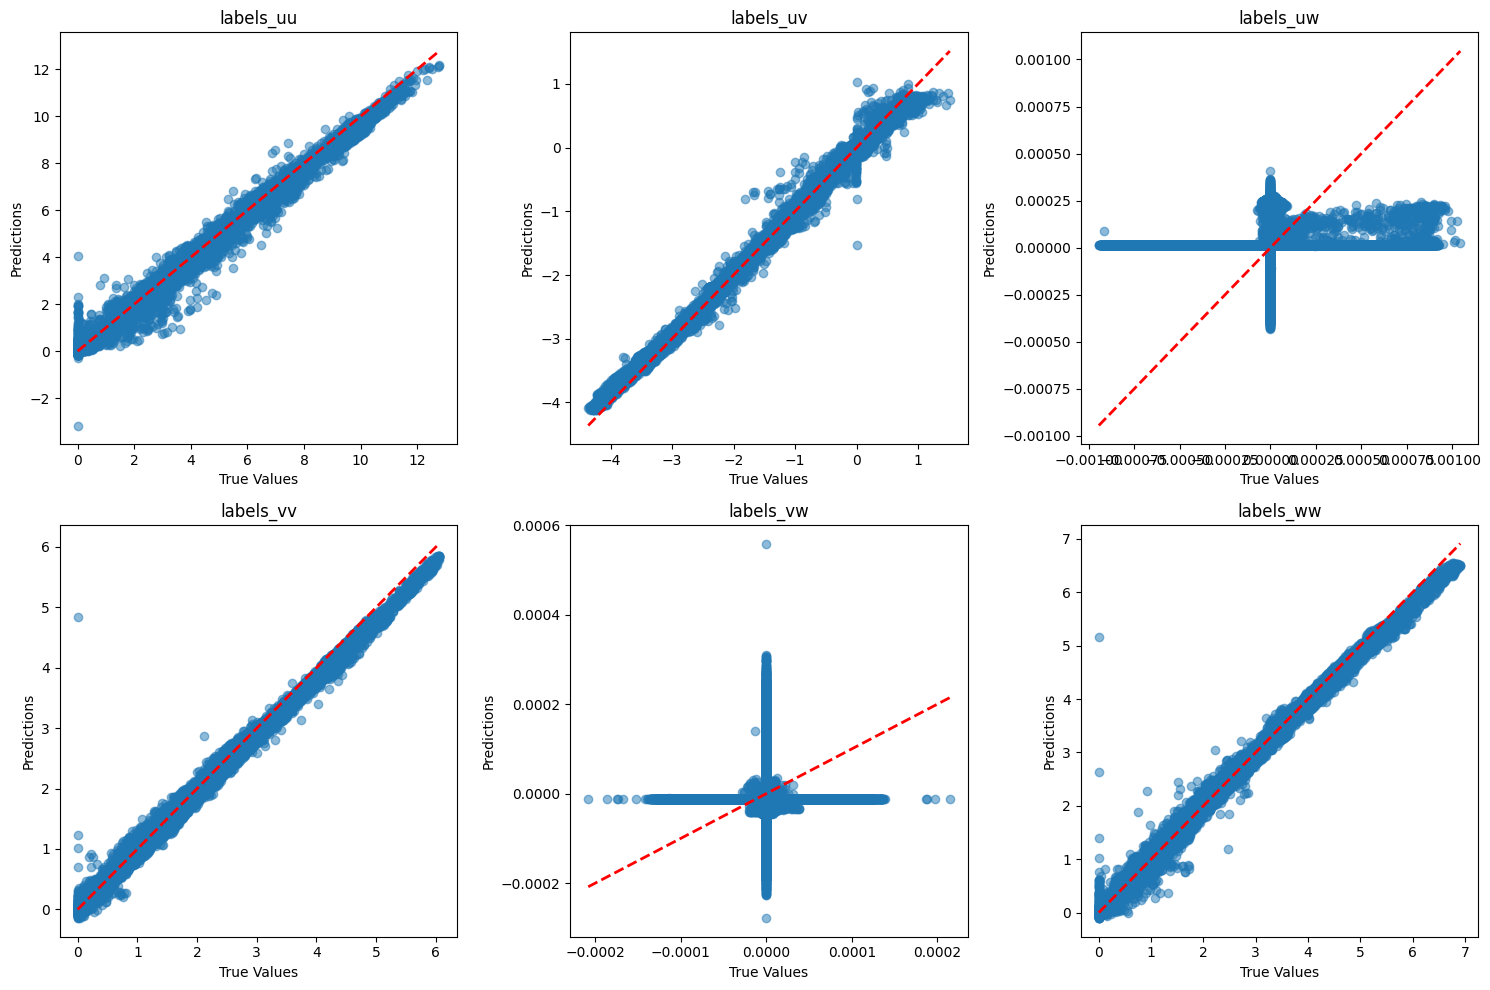

In [ ]:
# Plot predicted vs actual for each component
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, component in enumerate(target_cols):
    axes[idx].scatter(y_test[component], y_pred[:, idx], alpha=0.5)
    axes[idx].plot([y_test[component].min(), y_test[component].max()],
                   [y_test[component].min(), y_test[component].max()],
                   'r--', lw=2)
    axes[idx].set_title(f'{component}')
    axes[idx].set_xlabel('True Values')
    axes[idx].set_ylabel('Predictions')

plt.tight_layout()
plt.show()

In [ ]:
!pip install xgboost
from xgboost import XGBRegressor
from sklearn.multioutput import MultiOutputRegressor

   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.0/124.9 MB 3.9 MB/s eta 0:00:32
    --------------------------------------- 1.6/124.9 MB 3.7 MB/s eta 0:00:34
    --------------------------------------- 2.4/124.9 MB 3.1 MB/s eta 0:00:40
   - -------------------------------------- 3.1/124.9 MB 3.5 MB/s eta 0:00:35
   - -------------------------------------- 3.9/124.9 MB 3.5 MB/s eta 0:00:35
   - -------------------------------------- 4.7/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 5.5/124.9 MB 3.6 MB/s eta 0:00:34
   -- ------------------------------------- 6.6/124.9 MB 3.7 MB/s eta 0:00:33
   -- ------------------------------------- 7.3/124.9 MB 3.7 MB/s eta 0:00:32
   -- ------------------------------------- 8.1/124.9 MB 3.7 MB/s eta 0:00:32
   -- ------------------------------------- 8.9/124.9 MB 3.7 MB/s eta 0:00:32


In [ ]:
# Initialize base XGBoost model with appropriate parameters
base_model = XGBRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=6,
    random_state=42,
    tree_method='hist'
)

In [ ]:
# Wrap with MultiOutputRegressor for multiple targets
multi_output_model = MultiOutputRegressor(base_model)

In [ ]:
# Train the model
multi_output_model.fit(X_train, y_train)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.1, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=6,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=100, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...))

In [ ]:
# Make predictions
y_pred = multi_output_model.predict(X_test)

In [ ]:
# Evaluate performance for each Reynolds stress component
for i, component in enumerate(target_cols):
    print(f'\nMetrics for {component}:')
    mse = np.mean((y_test.iloc[:, i] - y_pred[:, i])**2)
    mae = np.mean(np.abs(y_test.iloc[:, i] - y_pred[:, i]))
    print(f'MSE: {mse:.6f}')
    print(f'MAE: {mae:.6f}')


Metrics for labels_uu:
MSE: 0.017393
MAE: 0.042058

Metrics for labels_uv:
MSE: 0.001333
MAE: 0.011732

Metrics for labels_uw:
MSE: 0.000000
MAE: 0.000013

Metrics for labels_vv:
MSE: 0.000749
MAE: 0.010162

Metrics for labels_vw:
MSE: 0.000000
MAE: 0.000003

Metrics for labels_ww:
MSE: 0.002381
MAE: 0.017873


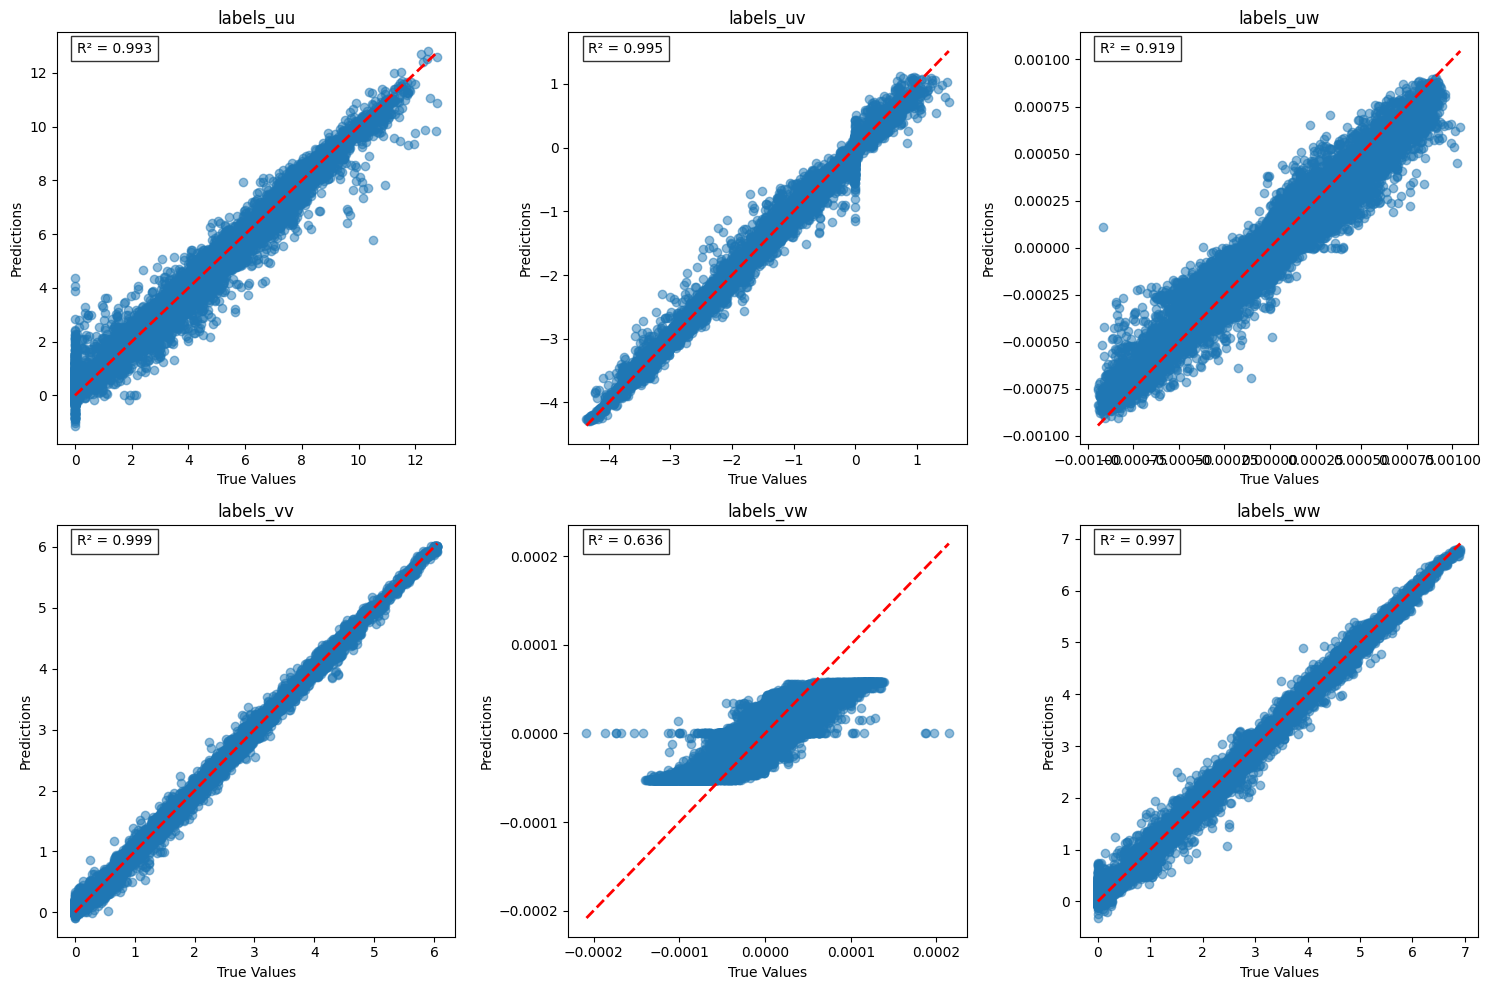


Metrics for labels_uu:
MSE: 0.017393
MAE: 0.042058
R² Score: 0.993058

Metrics for labels_uv:
MSE: 0.001333
MAE: 0.011732
R² Score: 0.995461

Metrics for labels_uw:
MSE: 0.000000
MAE: 0.000013
R² Score: 0.918971

Metrics for labels_vv:
MSE: 0.000749
MAE: 0.010162
R² Score: 0.998506

Metrics for labels_vw:
MSE: 0.000000
MAE: 0.000003
R² Score: 0.636258

Metrics for labels_ww:
MSE: 0.002381
MAE: 0.017873
R² Score: 0.997099


In [ ]:
# Plot predicted vs actual for each component
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.ravel()

for idx, component in enumerate(target_cols):
    # Scatter plot
    axes[idx].scatter(y_test[component], y_pred[:, idx], alpha=0.5)

    # Perfect prediction line
    axes[idx].plot([y_test[component].min(), y_test[component].max()],
                   [y_test[component].min(), y_test[component].max()],
                   'r--', lw=2)

    # Add labels and title
    axes[idx].set_title(f'{component}')
    axes[idx].set_xlabel('True Values')
    axes[idx].set_ylabel('Predictions')

    # Add R² score
    r2 = r2_score(y_test[component], y_pred[:, idx])
    axes[idx].text(0.05, 0.95, f'R² = {r2:.3f}',
                   transform=axes[idx].transAxes,
                   bbox=dict(facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Print detailed metrics for each component
for i, component in enumerate(target_cols):
    print(f'\nMetrics for {component}:')
    mse = np.mean((y_test.iloc[:, i] - y_pred[:, i])**2)
    mae = np.mean(np.abs(y_test.iloc[:, i] - y_pred[:, i]))
    r2 = r2_score(y_test.iloc[:, i], y_pred[:, i])
    print(f'MSE: {mse:.6f}')
    print(f'MAE: {mae:.6f}')
    print(f'R² Score: {r2:.6f}')


5598/5598 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step


<Figure size 1500x1000 with 0 Axes>

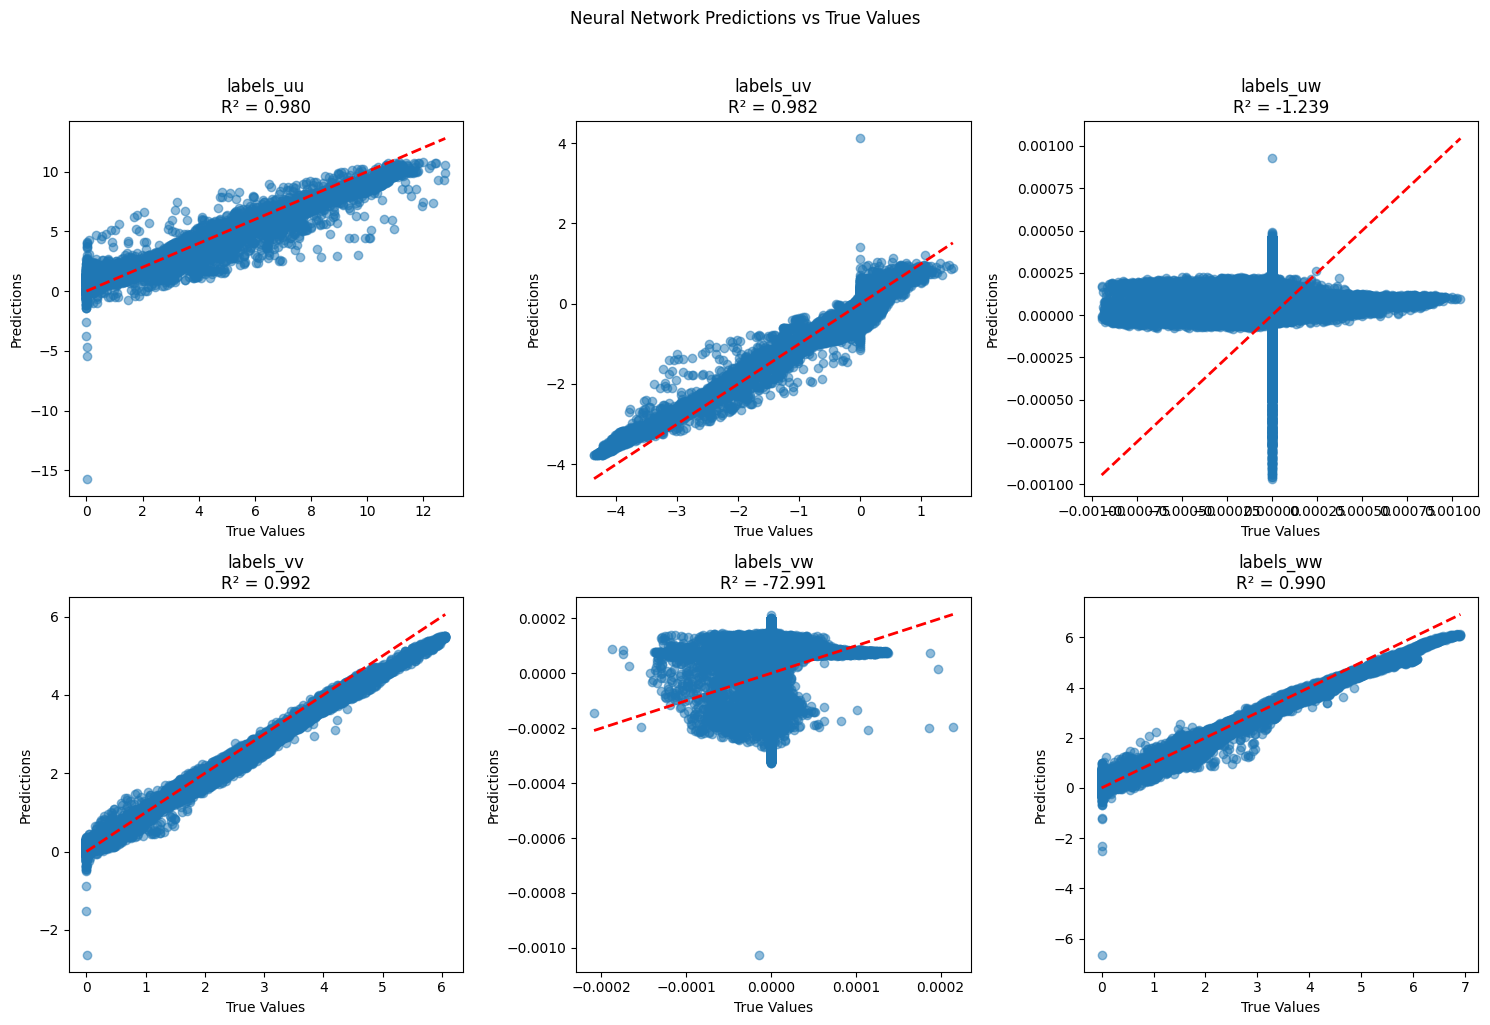


Detailed Results for Neural Network:

labels_uu:
MSE: 0.048970
MAE: 0.079950
R2: 0.980455

labels_uv:
MSE: 0.005421
MAE: 0.028974
R2: 0.981540

labels_uw:
MSE: 0.000000
MAE: 0.000122
R2: -1.239369

labels_vv:
MSE: 0.004200
MAE: 0.030540
R2: 0.991626

labels_vw:
MSE: 0.000000
MAE: 0.000105
R2: -72.990915

labels_ww:
MSE: 0.008103
MAE: 0.041458
R2: 0.990125


<Figure size 1500x1000 with 0 Axes>

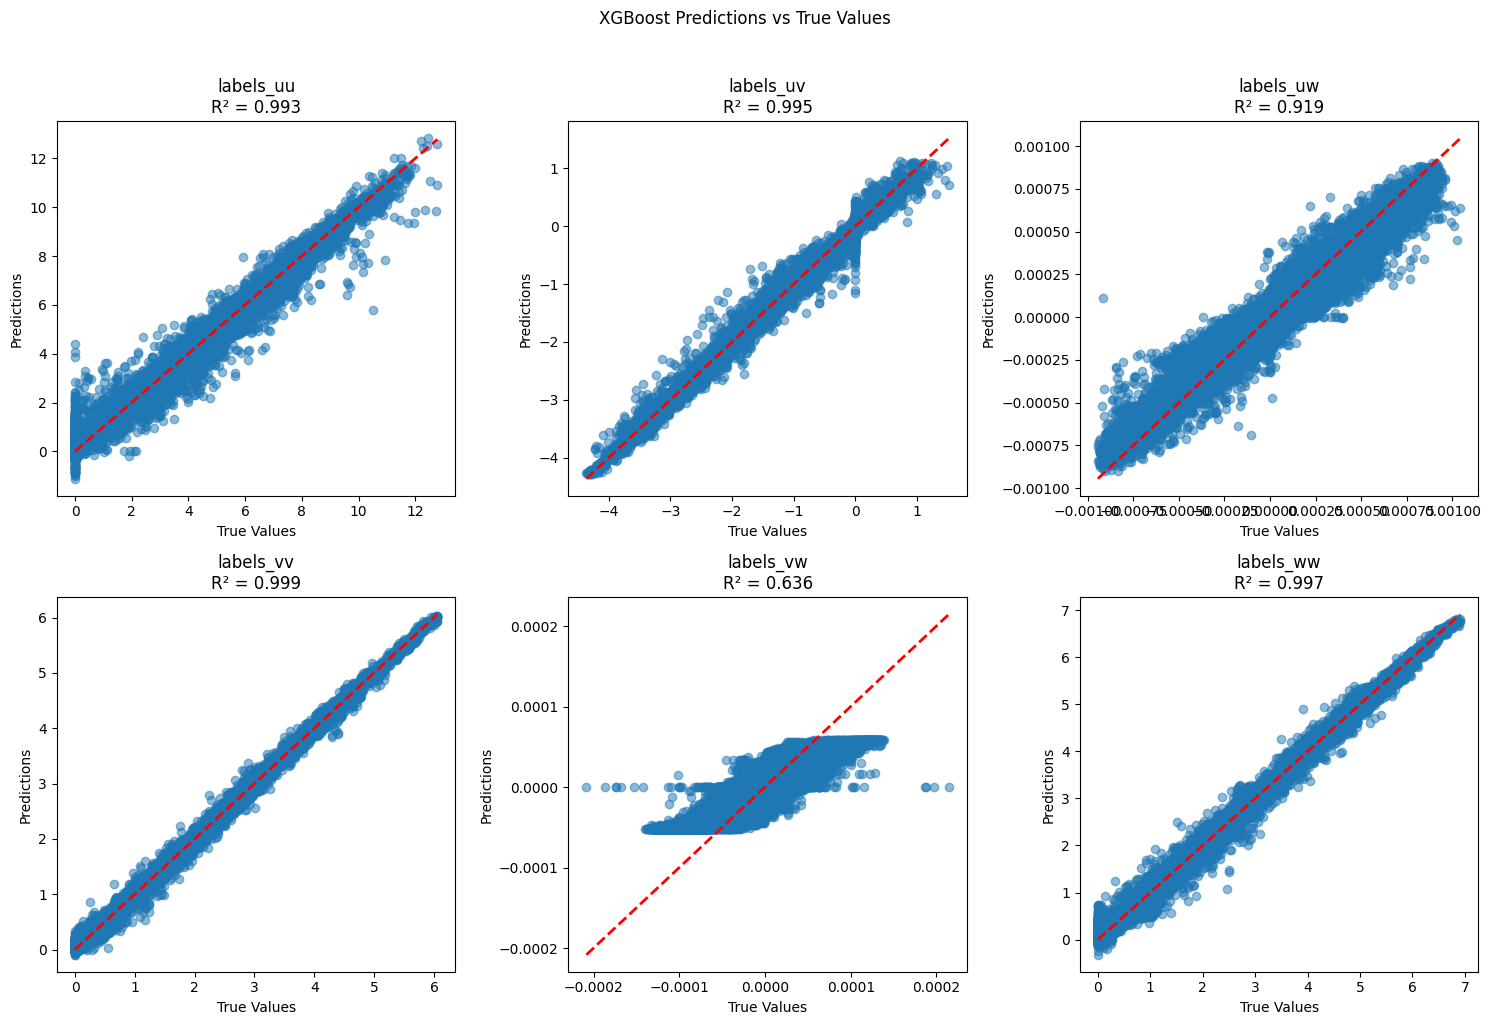


Detailed Results for XGBoost:

labels_uu:
MSE: 0.017393
MAE: 0.042058
R2: 0.993058

labels_uv:
MSE: 0.001333
MAE: 0.011732
R2: 0.995461

labels_uw:
MSE: 0.000000
MAE: 0.000013
R2: 0.918971

labels_vv:
MSE: 0.000749
MAE: 0.010162
R2: 0.998506

labels_vw:
MSE: 0.000000
MAE: 0.000003
R2: 0.636258

labels_ww:
MSE: 0.002381
MAE: 0.017873
R2: 0.997099

Model Comparison:

labels_uu:
Metric    Neural Network    XGBoost
----------------------------------------
R2              0.980455   0.993058
MSE             0.048970   0.017393
MAE             0.079950   0.042058

labels_uv:
Metric    Neural Network    XGBoost
----------------------------------------
R2              0.981540   0.995461
MSE             0.005421   0.001333
MAE             0.028974   0.011732

labels_uw:
Metric    Neural Network    XGBoost
----------------------------------------
R2             -1.239369   0.918971
MSE             0.000000   0.000000
MAE             0.000122   0.000013

labels_vv:
Metric    Neural Network    X

In [ ]:
# Function to evaluate and plot predictions
from sklearn.metrics import mean_squared_error, mean_absolute_error # Import mean_squared_error and mean_absolute_error
def evaluate_model(y_true, y_pred, model_name):
    plt.figure(figsize=(15, 10))
    fig, axes = plt.subplots(2, 3, figsize=(15, 10))
    axes = axes.ravel()

    results = {}

    for idx, component in enumerate(target_cols):
        # Scatter plot
        axes[idx].scatter(y_true[component], y_pred[:, idx], alpha=0.5)
        axes[idx].plot([y_true[component].min(), y_true[component].max()],
                      [y_true[component].min(), y_true[component].max()],
                      'r--', lw=2)

        # Calculate metrics
        mse = mean_squared_error(y_true[component], y_pred[:, idx])
        mae = mean_absolute_error(y_true[component], y_pred[:, idx])
        r2 = r2_score(y_true[component], y_pred[:, idx])

        # Store results
        results[component] = {
            'MSE': mse,
            'MAE': mae,
            'R2': r2
        }

        # Plot details
        axes[idx].set_title(f'{component}\nR² = {r2:.3f}')
        axes[idx].set_xlabel('True Values')
        axes[idx].set_ylabel('Predictions')

    plt.suptitle(f'{model_name} Predictions vs True Values', y=1.02)
    plt.tight_layout()
    plt.show()

    # Print detailed results
    print(f"\nDetailed Results for {model_name}:")
    for component, metrics in results.items():
        print(f"\n{component}:")
        for metric_name, value in metrics.items():
            print(f"{metric_name}: {value:.6f}")

    return results

# Test Neural Network
nn_pred = model.predict(X_test)
nn_results = evaluate_model(y_test, nn_pred, "Neural Network")

# Test XGBoost
xgb_pred = multi_output_model.predict(X_test)
xgb_results = evaluate_model(y_test, xgb_pred, "XGBoost")

# Compare models
print("\nModel Comparison:")
for component in target_cols:
    print(f"\n{component}:")
    print("Metric    Neural Network    XGBoost")
    print("-" * 40)
    for metric in ['R2', 'MSE', 'MAE']:
        nn_value = nn_results[component][metric]
        xgb_value = xgb_results[component][metric]
        print(f"{metric:<9} {nn_value:14.6f} {xgb_value:10.6f}")
